<a href="https://colab.research.google.com/github/Patrick-Sinnott/Machine-Learning-Ising-Model---Python-Project-Work-in-Progress-/blob/main/Finished_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Lattice shape = (5000, 15, 15)
T_low = 2.1000068381515975
T_high = 3.299918122728245
E_low = -3.8577777777777778
E_high = -0.8355555555555556
Model: "T_fc_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Lattice_Input (InputLayer)  [(None, 15, 15, 1)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 225)               0         
                                                                 
 dense_12 (Dense)            (None, 225)               50850     
                                                                 
 dense_13 (Dense)            (None, 100)               22600     
                                                                 
 dropout_4 (Dropout)         (None, 100)         

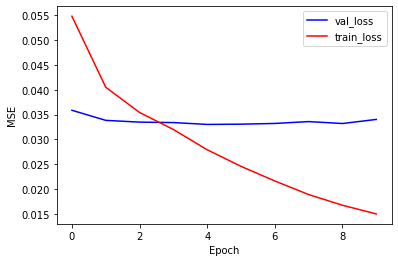

--------------
true = 0.6568148849239287
pred = [0.8123486]
--------------
true = 0.7739922124167196
pred = [0.51810515]
--------------
true = 0.18566975732485597
pred = [0.07517585]
--------------
true = 0.33435841759996027
pred = [0.3950376]
--------------
true = 0.2683965586774657
pred = [0.5140307]
--------------
true = 0.4651268472152566
pred = [0.611447]
--------------
true = 0.2584368744627616
pred = [0.4036409]
--------------
true = 0.023915964295343314
pred = [0.3980029]
--------------
true = 0.8813263025170336
pred = [0.643829]
--------------
true = 0.8408312150289547
pred = [0.6149445]


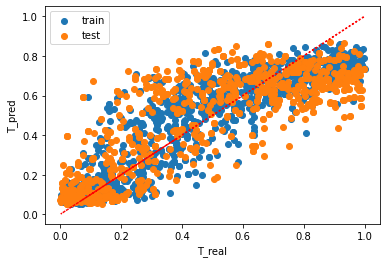

Epoch 1/20
1000/1000 [==============================] - 13s 12ms/step - loss: 0.0309 - val_loss: 0.0245
Epoch 2/20
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0239 - val_loss: 0.0240
Epoch 3/20
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0217 - val_loss: 0.0233
Epoch 4/20
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0205 - val_loss: 0.0271
Epoch 5/20
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0192 - val_loss: 0.0270
Epoch 6/20
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0179 - val_loss: 0.0258
Epoch 7/20
1000/1000 [==============================] - 13s 13ms/step - loss: 0.0167 - val_loss: 0.0246
Epoch 8/20
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0141 - val_loss: 0.0253


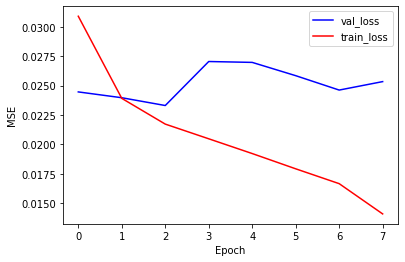

--------------
true = 0.28125504382446886
pred = [0.19711211]
--------------
true = 0.6230219500932789
pred = [0.79793376]
--------------
true = 0.3971474096981018
pred = [0.5754611]
--------------
true = 0.9674569806151502
pred = [0.8044944]
--------------
true = 0.8936999056947584
pred = [0.8552205]
--------------
true = 0.98138427073274
pred = [0.8326694]
--------------
true = 0.26170099881853137
pred = [0.4311031]
--------------
true = 0.4452527894851376
pred = [0.371332]
--------------
true = 0.8770861790104981
pred = [0.651223]
--------------
true = 0.2678401435954711
pred = [0.22425425]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

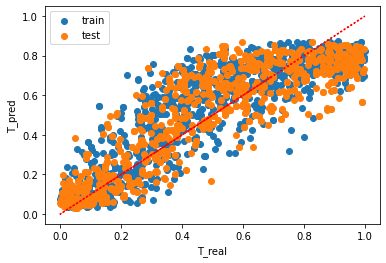

In [ ]:
#----------------------------- Importing Modules -------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow.keras.layers import BatchNormalization, Input, Dropout, Conv2D, Flatten, Dense, Reshape, Concatenate, Embedding, ReLU, MaxPooling2D
from tensorflow.python.keras.activations import tanh, relu, sigmoid
from tensorflow.python.keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.initializers import TruncatedNormal, Orthogonal, RandomNormal
from tensorflow.keras.constraints import Constraint
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from kerastuner.tuners import RandomSearch
#from keras.layers.merge import Merge
from datetime import datetime
import keras.backend as K
from tensorflow.keras.utils import plot_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.models import load_model 
#tf.config.experimental_run_functions_eagerly(True)
tf.__version__

# Mount drive
from google.colab import drive
#drive._mount('/content/drive')
drive.mount('/content/drive')

#-------------------------------------- Importing Data ---------------------------------------------
# Import training datafile from specified path
path = '/content/drive/My Drive/for_patrick/data_5k_[2,1-3,3]_L15_EM.npz'

with np.load(path) as df:
  lats = df['lattices']
  temps = df['temperatures']
  mags = df['magnetizations']
  enes = df['energies']

"""
# Make sure mags and enes correspond to temps order
indx = np.argsort(np.unique(temps))
mags = mags[indx]
enes = enes[indx]
"""

# Assigning variables used throughout
N_samples, L, _ = lats.shape

# Normalizing temperatures and energies between [-1,1] - magnetizations already in this range
T_low, T_high = np.min(temps), np.max(temps)
E_low, E_high = np.min(enes), np.max(enes)

#temps_std = 2*(temps - T_low)/(T_high - T_low) - 1
temps_std = (temps - T_low)/(T_high - T_low)
enes_std = 2*(enes - E_low)/(E_high - E_low) - 1

# Printing data
print('Lattice shape = {}'.format(lats.shape))
print('T_low = {}'.format(T_low))
print('T_high = {}'.format(T_high))
print('E_low = {}'.format(E_low))
print('E_high = {}'.format(E_high))

# Model variables 
adam = Adam(learning_rate=0.0002)

# Ising Functions
def erg(lattice):
    '''
    Function that calculates the energy per site (intensive) of given lattice
         -INPUT:  
           (1) lattice: an (N,N) array with values of [-1,+1] at each site
         -OUTPUT: 
           returns scalar value for average energy per site
    '''       
    x = lattice.shape[0]
    E = 0
    for p in range(x):
        for q in range(x):            
            S = lattice[p,q]
            neigh = lattice[(p+1)%x, q] + lattice[(p-1), q] + lattice[p,(q+1)%x] + lattice[p,(q-1)]
            E += -neigh*S
    return E/float(lattice.shape[0]**2)

def mag(lattice):
    '''
    Function that calculates the magnetization per site (intensive) of given lattice
         -INPUT:  
          (1) lattice: an (N,N) array with values of [-1,+1] at each site
         -OUTPUT: 
          returns scalar value for average magnetization per site
    '''
    L = lattice.shape[0]
    lattice = lattice.reshape(L,L)
    magnetization = np.sum(lattice)
    return magnetization/float(L**2)

def T_fc_model(nodes=[100,100]):
  # Input layer
  X_input = Input(shape = (L,L,1), name='Lattice_Input')
  x = Flatten()(X_input)

  x = Dense(L**2, activation=relu)(x)

  # Hidden Layers
  for n in nodes:
    x = Dense(n, activation=relu)(x)
    #x = BatchNormalization(momentum=0.8)(x)
    x = Dropout(0.2)(x)

  # Output Layer
  T_pred = Dense(1, activation=sigmoid)(x)

  model = Model(inputs=X_input, outputs=T_pred, name='T_fc_model')
  model.compile(optimizer=adam, loss='mse')
  return model
  
T_fc_model().summary()

def T_conv_model(filters=(128,64,32)):
  # Input layers
  X_input = Input(shape = (L,L,1), name='Lattice_Input')

  # Conv Blocks
  for i, f in enumerate(filters):
    if i == 0:
      x = X_input

    x = Conv2D(filters=f, kernel_size=(4,4), padding='same')(x)
    x = MaxPooling2D((2,2))(x)
    #x = ReLU()(x)
    x = LeakyReLU(alpha=0.2)(x)
    #x = BatchNormalization(momentum=0.8)(x)
    #x = Dropout(0.2)(x)

  # Output FC Layers 
  x = Flatten()(x)
  x = Dense(32)(x)
  x = ReLU()(x)
  #x = Dropout(0.2)(x)
  #x = BatchNormalization(momentum=0.8)(x)

  T_pred = Dense(1, activation=sigmoid)(x)

  model = Model(inputs=X_input, outputs=T_pred, name='T_conv_model')
  model.compile(optimizer=adam, loss='mse')
  return model
  
T_conv_model().summary()

num_epochs = 20
batch_size = 16
test_size = 0.2

X_train, X_test, T_train, T_test = train_test_split(lats, temps_std, test_size=test_size)

t_fc_model = T_fc_model()
monitor = EarlyStopping(monitor='val_loss',
                        min_delta=0.00001,
                        patience=5,
                        verbose=0,
                        mode='auto',
                        restore_best_weights=True)

history = t_fc_model.fit(X_train, T_train,
                         validation_data=(X_test, T_test),
                         epochs=num_epochs,
                         verbose=1,
                         batch_size=batch_size,
                         callbacks=[monitor])


plt.figure()
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], color='b', label='val_loss')
plt.plot(range(len(history.history['loss'])), history.history['loss'], color='r', label='train_loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

num_samples = 1000
inds = np.random.randint(0,len(X_train),num_samples)
x, t = X_train[inds], T_train[inds]
pred = t_fc_model.predict(x)

inds = np.random.randint(0,len(X_test),num_samples)
x2, t2 = X_test[inds], T_test[inds]
pred2 = t_fc_model.predict(x2)

for i in range(10):
  print("--------------")
  print("true = {}".format(t2[i]))
  print("pred = {}".format(pred2[i]))


plt.figure()
plt.plot(t, t, linestyle=':', color='r')
plt.scatter(t, pred, label='train')
plt.scatter(t2, pred2, label='test')
plt.xlabel('T_real')
plt.ylabel('T_pred')
plt.legend()
plt.show()

num_epochs = 20
batch_size = 4
test_size = 0.2

X_train, X_test, T_train, T_test = train_test_split(lats, temps_std, test_size=test_size)

t_conv_model = T_conv_model()

monitor = EarlyStopping(monitor='val_loss',
                        min_delta=0.00001,
                        patience=5,
                        verbose=0,
                        mode='auto',
                        restore_best_weights=True)

history = t_conv_model.fit(X_train, T_train,
                           validation_data=(X_test, T_test),
                           epochs=num_epochs,
                           verbose=1,
                           batch_size=batch_size,
                           callbacks=[monitor])

plt.figure()
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], color='b', label='val_loss')
plt.plot(range(len(history.history['loss'])), history.history['loss'], color='r', label='train_loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

num_samples = 1000
inds = np.random.randint(0,len(X_train),num_samples)
x, t = X_train[inds], T_train[inds]
pred = t_conv_model.predict(x)

inds = np.random.randint(0,len(X_test),num_samples)
x2, t2 = X_test[inds], T_test[inds]
pred2 = t_conv_model.predict(x2)

for i in range(10):
  print("--------------")
  print("true = {}".format(t2[i]))
  print("pred = {}".format(pred2[i]))

  plt.figure()
plt.plot(t, t, linestyle=':', color='r')
plt.scatter(t, pred, label='train')
plt.scatter(t2, pred2, label='test')
plt.xlabel('T_real')
plt.ylabel('T_pred')
plt.legend()
plt.show()